In [1]:
import pandas as pd
import os
import pyspark 
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [4]:
sc.master

'local[*]'

In [5]:
import re 
from operator import add

In [6]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .getOrCreate()

df = spark.read.csv('/ca2/ProjectTweets.csv',header=True,inferSchema = True, sep="|")

print(df.collect())

IOPub data rate exceeded.                                                       
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
# spark is from the previous example.
sc = spark.sparkContext

# A CSV dataset is pointed to by path.

path = "/ca2/ProjectTweets.csv"
TweetsDF = spark.read.csv(path)

In [8]:
TweetsDF.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)



In [9]:
from pyspark.sql.types import *

schema = StructType([StructField('target', IntegerType(), True),

                     StructField('ids', IntegerType(), True),

                     StructField('date', StringType(), True),

                     StructField('flag', StringType(), True),

                     StructField('user', StringType(), True),

                     StructField('text', StringType(), True)])

In [34]:
TweetsDF = spark.read.csv(path,schema)
TweetsDF

DataFrame[target: int, ids: int, date: string, flag: string, user: string, text: string]

In [10]:
def print_registered_model_info(rm):

    #print("name: {}".format(rm.name))

    #print("tags: {}".format(rm.tags))

    #print("description: {}".format(rm.description))

    print(rm)

    print('----------')

 

def print_model_version_info(mv):

    #print("Name: {}".format(mv.name))

    #print("Version: {}".format(mv.version))

    #print("Tags: {}".format(mv.tags))    

    print(mv)

    print('----------')

 

def print_models_info(mv):

    for m in mv:

        print(m)

    print('-----------')

        #print("name: {}".format(m.name))

        #print("latest version: {}".format(m.version))

        #print("run_id: {}".format(m.run_id))

        #print("current_stage: {}".format(m.current_stage))    

        

def delete_registered_model(modelname) : 

  mv = client.get_registered_model(model_name)

  mvv = mv.latest_versions

  for i in mvv:

    try:

      if i.current_stage != "Archived":

        client.transition_model_version_stage(model_name, i.version, "archived")

      client.delete_registered_model(model_name)

    except Exception as e:

      print(traceback.format_exc())

In [62]:
#pip install spark-nlp==3.3.3 wordcloud contractions gensim pyldavis==3.2.0

In [28]:
from pyspark.sql import functions as F

# Read raw csv file into SparkDataFrame

sdf_raw = spark.read.options(header=False,delimiter=',').schema(schema).csv(path).repartition(16).cache()

sdf_raw.show()

2023-11-10 15:31:57,383 WARN execution.CacheManager: Asked to cache already cached data.


+------+----------+--------------------+--------+---------------+--------------------+
|target|       ids|                date|    flag|           user|                text|
+------+----------+--------------------+--------+---------------+--------------------+
|  3778|1468674287|Tue Apr 07 03:05:...|NO_QUERY|      spwhitton|Just booted into ...|
| 46315|1677375587|Sat May 02 01:45:...|NO_QUERY|  Dancingkate16|I hate revising w...|
|660821|      null|Fri Jun 19 12:42:...|NO_QUERY|   MzVannaBlack|@introversive i w...|
|623046|      null|Thu Jun 18 15:42:...|NO_QUERY|       arlenexo|it's JUNE - almos...|
|108478|1824293567|Sun May 17 00:46:...|NO_QUERY|     lavishlace|Still wOrk , fuck...|
|181009|1966735305|Fri May 29 18:18:...|NO_QUERY|     Rachael102|is gonna stop upl...|
| 94860|1771212334|Mon May 11 23:34:...|NO_QUERY|  alexandragood|pizookies AND dan...|
|627407|      null|Thu Jun 18 17:47:...|NO_QUERY|       shiney42|@PhillyNYY See Ya...|
|755385|      null|Mon Jun 22 19:00:...|NO_

In [13]:
# Count number different values in target feature >> no class imbalance

sdf_raw.groupBy('target').count().show()

+------+-----+
|target|count|
+------+-----+
|175229|    1|
|425375|    1|
|724936|    1|
|310547|    1|
|261041|    1|
|118185|    1|
|129791|    1|
| 64423|    1|
|907254|    1|
|482333|    1|
|283137|    1|
|270200|    1|
| 89574|    1|
| 54190|    1|
|761497|    1|
|216014|    1|
|220404|    1|
|345390|    1|
|175197|    1|
|219352|    1|
+------+-----+
only showing top 20 rows



In [29]:
# Show some stats
sdf_raw.describe().show()

+-------+------------------+--------------------+--------------------+--------+--------------------+--------------------+
|summary|            target|                 ids|                date|    flag|                user|                text|
+-------+------------------+--------------------+--------------------+--------+--------------------+--------------------+
|  count|           1600000|             1167087|             1600000| 1600000|             1600000|             1600000|
|   mean|          799999.5|1.9151683893187106E9|                null|    null| 4.325887521835714E9|                null|
| stddev|461880.35968924547|1.5759017606746918E8|                null|    null|5.162733218454888E10|                null|
|    min|                 0|          1467810369|Fri Apr 17 20:30:...|NO_QUERY|        000catnap000|                 ...|
|    max|           1599999|          2072532109|Wed May 27 07:27:...|NO_QUERY|          zzzzeus111|ï¿½ï¿½ï¿½ï¿½ï¿½ß§...|
+-------+---------------

In [14]:
df_raw = sdf_raw.toPandas()

df_raw['length']= df_raw['text'].str.split().map(lambda x: len(x))

 

df_class0 = df_raw[df_raw['target']==0]

df_class4 = df_raw[df_raw['target']==4]

 

print(f"Overall average text length: {df_raw['length'].mean()}")

print(f"Average text length class 0 (negative): {df_class0['length'].mean()}")

print(f"Average text length class 4 (positive): {df_class4['length'].mean()}")

print(f"Median text length class 0 (negative): {df_class0['length'].median()}")

print(f"Median text length class 4 (positive): {df_class4['length'].median()}")

print(f"Max text length class 0 (negative): {df_class0['length'].max()}")

print(f"Max text length class 4 (positive): {df_class4['length'].max()}")

print(f"Min text length class 0 (negative): {df_class0['length'].min()}")

print(f"Min text length class 4 (positive): {df_class4['length'].min()}")

Overall average text length: 13.176150625
Average text length class 0 (negative): 19.0
Average text length class 4 (positive): 21.0
Median text length class 0 (negative): 19.0
Median text length class 4 (positive): 21.0
Max text length class 0 (negative): 19
Max text length class 4 (positive): 21
Min text length class 0 (negative): 19
Min text length class 4 (positive): 21


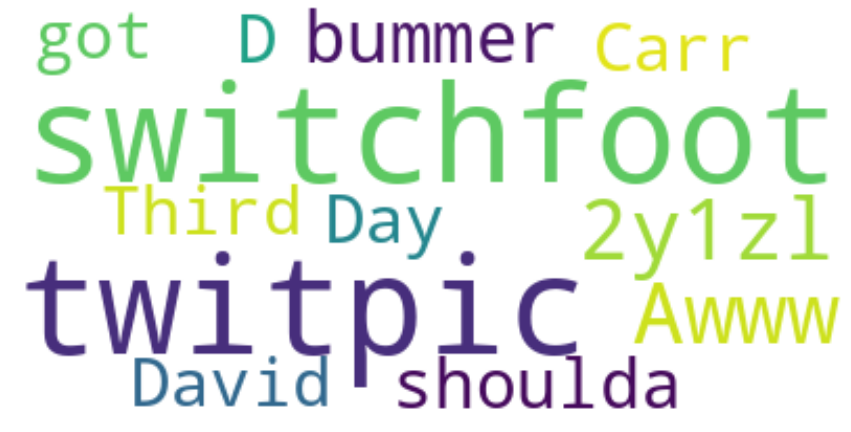

In [16]:
from wordcloud import WordCloud

from wordcloud import ImageColorGenerator

from wordcloud import STOPWORDS

import matplotlib.pyplot as plt

import pandas as pd

 

# Word cloud for negative tweets

neg = sdf_raw.filter(sdf_raw.target == 0).toPandas()

text = " ".join(i for i in neg.text)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure( figsize=(15,10))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

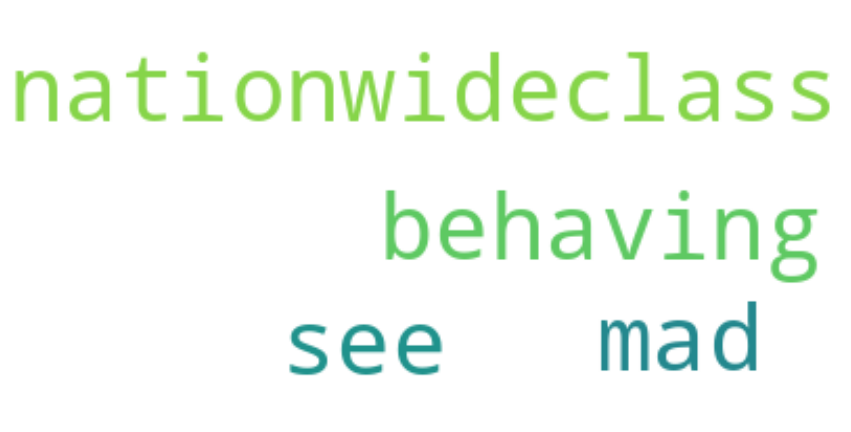

In [35]:
# Word cloud for positive tweets

pos = sdf_raw.filter(sdf_raw.target == 4).toPandas()

text = " ".join(i for i in pos.text)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure( figsize=(15,10))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

In [39]:
# Load the regular expression library

import re

 

# Remove punctuation

df_raw['text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Remove Twitter handle

df_raw['text'].map(lambda x: re.sub("@[^\s]+", '', x))

# Remove URLs

df_raw['text'].map(lambda x: re.sub(r"www\S+", '', x))

df_raw['text'].map(lambda x: re.sub(r"http\S+", '', x))

# Convert the titles to lowercase

df_raw['text'].map(lambda x: x.lower()) 

# Print out the first rows of papers

df_raw['text'].head()

0    Just booted into Windows to upload something s...
1    I hate revising when the sun comes out and I'm...
2    @introversive i was just saying that the other...
3    it's JUNE - almost JULY. getting sick of this ...
4        Still wOrk , fuck , I'm still at wooorrrkkkk 
Name: text, dtype: object

In [40]:
import gensim

from gensim.utils import simple_preprocess

import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = stopwords.words('english')

stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):

    for sentence in sentences:

        # deacc=True removes punctuations

        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):

    return [[word for word in simple_preprocess(str(doc)) 

             if word not in stop_words] for doc in texts]

data = df_raw['text'].values.tolist()

data_words = list(sent_to_words(data))

# remove stop words

data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /home/hduser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['booted', 'windows', 'upload', 'something', 'since', 'internet', 'even', 'worse', 'ubuntu']


In [41]:
import gensim.corpora as corpora

# Create Dictionary

id2word = corpora.Dictionary(data_words)

# Create Corpus

texts = data_words

# Term Document Frequency

corpus = [id2word.doc2bow(text) for text in texts]

# View

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


In [42]:
from pprint import pprint

# number of topics

num_topics = 10

# Build LDA model

lda_model = gensim.models.LdaMulticore(corpus=corpus,

                                       id2word=id2word,

                                       num_topics=num_topics)

# Print the Keyword in the 10 topics

pprint(lda_model.print_topics())

doc_lda = lda_model[corpus]

[(0,
  '0.033*"miss" + 0.029*"getting" + 0.024*"days" + 0.024*"school" + '
  '0.024*"last" + 0.019*"ready" + 0.016*"already" + 0.015*"summer" + '
  '0.013*"year" + 0.013*"night"'),
 (1,
  '0.113*"quot" + 0.030*"yes" + 0.022*"new" + 0.013*"song" + 0.011*"hahaha" + '
  '0.010*"iphone" + 0.009*"video" + 0.008*"blog" + 0.007*"fm" + 0.006*"album"'),
 (2,
  '0.029*"lol" + 0.029*"know" + 0.028*"love" + 0.028*"thanks" + '
  '0.019*"twitter" + 0.017*"haha" + 0.012*"oh" + 0.012*"hey" + 0.012*"thank" + '
  '0.012*"sorry"'),
 (3,
  '0.036*"want" + 0.025*"go" + 0.025*"see" + 0.024*"watching" + 0.023*"wait" + '
  '0.017*"show" + 0.016*"watch" + 0.015*"cant" + 0.014*"wanna" + '
  '0.014*"movie"'),
 (4,
  '0.035*"work" + 0.030*"get" + 0.025*"still" + 0.021*"go" + 0.021*"sleep" + '
  '0.020*"back" + 0.019*"going" + 0.015*"got" + 0.014*"ok" + 0.014*"done"'),
 (5,
  '0.061*"day" + 0.049*"good" + 0.027*"today" + 0.024*"morning" + '
  '0.020*"happy" + 0.020*"great" + 0.018*"night" + 0.018*"time" + 0.015*"h

In [43]:
import pyLDAvis.gensim

import pickle 

import pyLDAvis

# Visualize the topics

pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.127987 -0.202356       1        1  15.641874
5     -0.138013  0.156976       2        1  12.910126
7     -0.106079 -0.168090       3        1  11.748627
4     -0.154235  0.112563       4        1  11.298433
8     -0.160064 -0.116856       5        1  10.078740
3     -0.002189 -0.018841       6        1   9.526651
0     -0.012995  0.286341       7        1   8.164623
6      0.275238 -0.083392       8        1   7.546717
1      0.233130 -0.082083       9        1   6.783657
9      0.193195  0.115738      10        1   6.300552, topic_info=       Term           Freq          Total Category  logprob  loglift
276    quot   92960.000000   92960.000000  Default  30.0000  30.0000
186    http   91420.000000   91420.000000  Default  29.0000  29.0000
15      day   96001.000000   96001.000000  Default  28.0000  28.0000
184     com   66972.000000   66972.000000  Default  27.0000  27.0000
192    good  112118.000000  112118.000000  Default  26.0000  26.0000
...     ...            ...            ...      ...      ...      ...
137    back    4746.125641   60478.870456  Topic10  -5.0800   0.2196
1067  music    3827.090356   11629.225959  Topic10  -5.2952   1.6531
120   today    4482.196719   71838.150128  Topic10  -5.1372  -0.0098
395     new    3954.507651   54474.972700  Topic10  -5.2625   0.1416
377     ill    3658.635753    7838.906766  Topic10  -5.3402   2.0025

[508 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2904      8  0.999798        add
908       2  0.999714  afternoon
2557      7  0.999844        ago
1879      8  0.999788      agree
1654      4  0.999777         ah
...     ...       ...        ...
211       1  0.219036        yet
211       4  0.745796        yet
211       6  0.000367        yet
211       9  0.034681        yet
1377      9  0.999892    youtube

[767 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 8, 5, 9, 4, 1, 7, 2, 10])

In [46]:
#pip install mlflow

In [49]:
sdf_train.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
| 3918|    1|
| 7340|    1|
|12940|    1|
|15447|    1|
|15790|    1|
|23571|    1|
|28170|    1|
|29993|    1|
|31261|    1|
|31528|    1|
|33717|    1|
|35820|    1|
|41751|    1|
|42468|    1|
|44906|    1|
|45011|    1|
|49331|    1|
|53634|    1|
|64423|    1|
|73933|    1|
+-----+-----+
only showing top 20 rows



In [61]:
#pip install spark-nlp==5.1.4

In [64]:
#pip install statsmodels

In [66]:
#pip install pandas-datareader

In [67]:
import pandas as pd 
import pandas_datareader as web 
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

#relax the display limits on columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [68]:
sdf_raw.show()

+------+----------+--------------------+--------+---------------+--------------------+
|target|       ids|                date|    flag|           user|                text|
+------+----------+--------------------+--------+---------------+--------------------+
|  3778|1468674287|Tue Apr 07 03:05:...|NO_QUERY|      spwhitton|Just booted into ...|
| 46315|1677375587|Sat May 02 01:45:...|NO_QUERY|  Dancingkate16|I hate revising w...|
|660821|      null|Fri Jun 19 12:42:...|NO_QUERY|   MzVannaBlack|@introversive i w...|
|623046|      null|Thu Jun 18 15:42:...|NO_QUERY|       arlenexo|it's JUNE - almos...|
|108478|1824293567|Sun May 17 00:46:...|NO_QUERY|     lavishlace|Still wOrk , fuck...|
|181009|1966735305|Fri May 29 18:18:...|NO_QUERY|     Rachael102|is gonna stop upl...|
| 94860|1771212334|Mon May 11 23:34:...|NO_QUERY|  alexandragood|pizookies AND dan...|
|627407|      null|Thu Jun 18 17:47:...|NO_QUERY|       shiney42|@PhillyNYY See Ya...|
|755385|      null|Mon Jun 22 19:00:...|NO_